In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load data

- Dataset Description: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [180]:
diabetes_df = pd.read_csv('../../../Datasets/diabetes.txt', delimiter='\t')

In [181]:
diabetes_df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

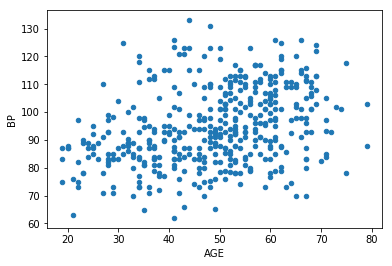

In [182]:
diabetes_df.plot(kind='scatter', x='AGE', y='BP')
plt.show()

In [183]:
# let's predict BP from AGE
x_train, x_test, y_train, y_test = train_test_split(diabetes_df[['AGE']], diabetes_df[['BP']], test_size=0.1, random_state=2018)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(397, 1) (397, 1) (45, 1) (45, 1)


## Simple Linear Regression

- link: https://en.wikipedia.org/wiki/Simple_linear_regression

Coefficients: 
 [[0.36849636]]
Train stats: 
	mean squared error: 166.7460687833943
	variance score: 0.12076516363669187
Test stats: 
	mean squared error: 193.14157241851288
	variance score: 0.0378610311057932


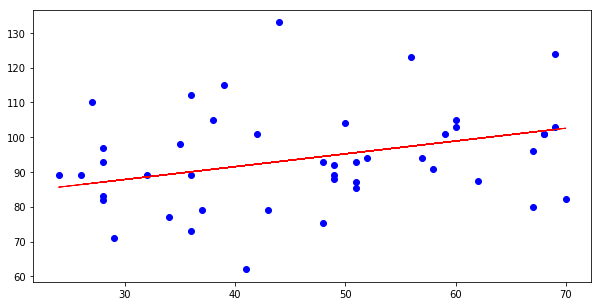

In [184]:
# initialize linear regression object
lr = LinearRegression(fit_intercept=True)

# fit data to the model
lr.fit(x_train, y_train)

# make prediction
predicted_train = lr.predict(x_train)
predicted_test  = lr.predict(x_test)

print('Coefficients: \n', lr.coef_)
print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))


# plot outputs
plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, predicted_test, color='red', linewidth=1)
plt.show()

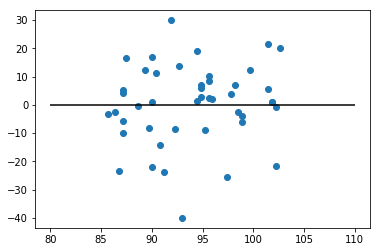

In [185]:
# Plot the residuals after fitting a linear model
plt.scatter(predicted_test, predicted_test-y_test)
plt.hlines(y=0, xmin=80, xmax=110)
plt.show()

## Ridge Regression

Coefficients: 
 [[0.36794686]]
Train stats: 
	mean squared error: 166.74611971216632
	variance score: 0.12076489509452559
Test stats: 
	mean squared error: 193.11468799981296
	variance score: 0.03799495642577155


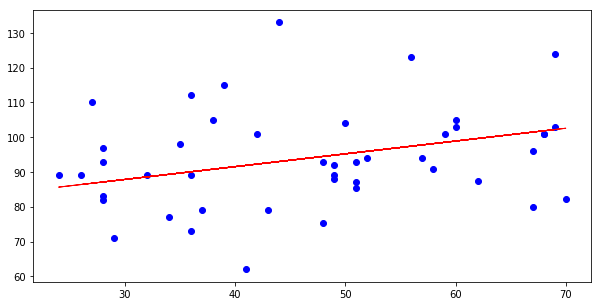

In [189]:
# initialize linear regression object
ridge_lr = Ridge(fit_intercept=True, alpha=100)

# fit data to the model
ridge_lr.fit(x_train, y_train)

# make prediction
predicted_train = ridge_lr.predict(x_train)
predicted_test  = ridge_lr.predict(x_test)

print('Coefficients: \n', ridge_lr.coef_)
print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))


# plot outputs
plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, predicted_test, color='red', linewidth=1)
plt.show()

## Lasso Regression

Coefficients: 
 [0.36553191]
Train stats: 
	mean squared error: 166.7475510080217
	variance score: 0.12075734801898497
Test stats: 
	mean squared error: 192.9979433371658
	variance score: 0.03857652251709365


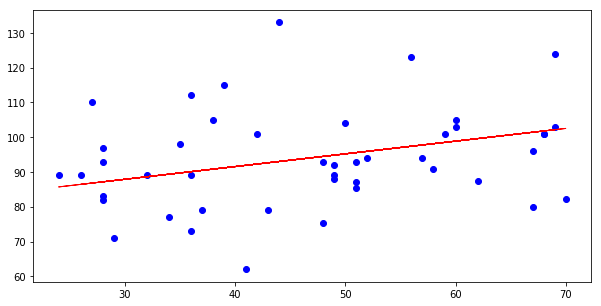

In [188]:
# initialize linear regression object
lasso_lr = Lasso(fit_intercept=True, alpha=0.5)

# fit data to the model
lasso_lr.fit(x_train, y_train)

# make prediction
predicted_train = lasso_lr.predict(x_train)
predicted_test  = lasso_lr.predict(x_test)

print('Coefficients: \n', lasso_lr.coef_)
print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))


# plot outputs
plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, predicted_test, color='red', linewidth=1)
plt.show()

## kNN Regression 

In [193]:
knn_r = KNeighborsRegressor(n_neighbors=4)

# fit data to the model
knn_r.fit(x_train, y_train)

# make prediction
predicted_train = knn_r.predict(x_train)
predicted_test  = knn_r.predict(x_test)

print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))

Train stats: 
	mean squared error: 175.08436360201515
	variance score: 0.07679819437684898
Test stats: 
	mean squared error: 233.93724180555557
	variance score: -0.16536348854524352


## Trees

In [199]:
dt_r = DecisionTreeRegressor()

# fit data to the model
dt_r.fit(x_train, y_train)

# make prediction
predicted_train = dt_r.predict(x_train)
predicted_test  = dt_r.predict(x_test)

print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))

Train stats: 
	mean squared error: 144.83347002131066
	variance score: 0.23630803866484418
Test stats: 
	mean squared error: 241.4521805644142
	variance score: -0.20279932039755955


In [204]:
rf_r = RandomForestRegressor()

# fit data to the model
rf_r.fit(x_train, y_train.values.reshape(len(y_train),))

# make prediction
predicted_train = rf_r.predict(x_train)
predicted_test  = rf_r.predict(x_test)

print('Train stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_train, y_pred=predicted_train)))
print('\tvariance score: {}'.format(r2_score(y_true=y_train, y_pred=predicted_train)))

print('Test stats: ')
print("\tmean squared error: {}".format(mean_squared_error(y_true=y_test, y_pred=predicted_test)))
print('\tvariance score: {}'.format(r2_score(y_true=y_test, y_pred=predicted_test)))

Train stats: 
	mean squared error: 146.40968762486773
	variance score: 0.22799680568137437
Test stats: 
	mean squared error: 240.77323205133393
	variance score: -0.19941712352441932
